In [1]:
from sklearn import datasets

iris = datasets.load_iris()

In [4]:

from sklearn import datasets
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

iris = datasets.load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)


linkage_methods = ['complete', 'average', 'single']
for linkage_method in linkage_methods:
    model = AgglomerativeClustering(n_clusters=3, linkage=linkage_method)
    model.fit(iris_df)
    labels = model.labels_


    print(f"Hierarchical Clustering with {linkage_method} linkage")
labels


Hierarchical Clustering with complete linkage
Hierarchical Clustering with average linkage
Hierarchical Clustering with single linkage


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

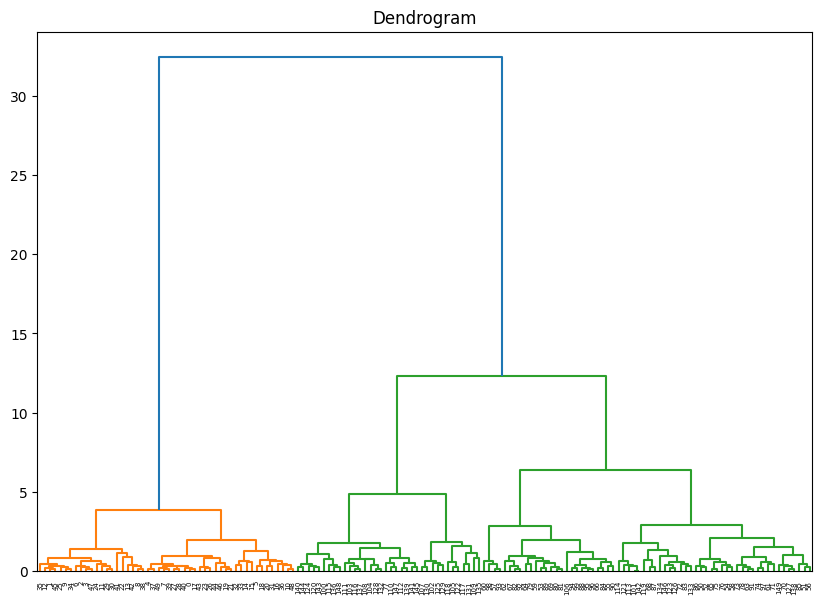

In [5]:


Z = linkage(iris_df, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram")
plt.show()

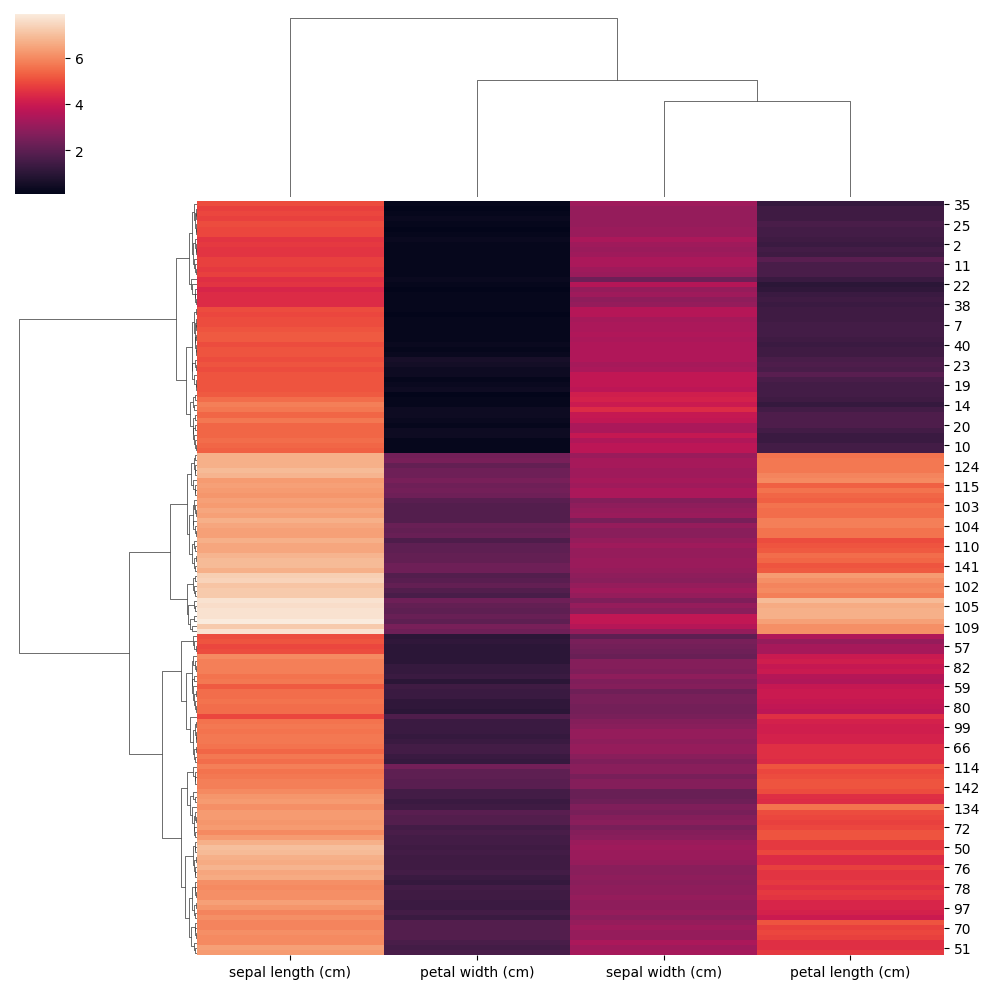

In [6]:


import seaborn as sns
import matplotlib.pyplot as plt

sns.clustermap(iris_df, method='ward', metric='euclidean')  # You can customize method and metric
plt.show()

In [7]:


from sklearn import datasets
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
import numpy as np

def dunn_index(labels, data):
    """
    Computes the Dunn Index for a given clustering.

    Args:
        labels: A list or array of cluster labels for each data point.
        data: A numpy array or pandas DataFrame of the data points.

    Returns:
        The Dunn Index.
    """
    n_clusters = len(set(labels))
    if n_clusters <= 1:
        return float('inf')

    cluster_centers = []
    for i in range(n_clusters):
        cluster_members = data[labels == i]
        cluster_centers.append(np.mean(cluster_members, axis=0))

    distances = pairwise_distances(cluster_centers)
    min_intercluster_distance = np.min(distances[distances > 0])

    max_intracluster_distance = 0
    for i in range(n_clusters):
        cluster_members = data[labels == i]
        if len(cluster_members) > 1:
            intracluster_distances = pairwise_distances(cluster_members)
            max_intracluster_distance = max(
                max_intracluster_distance, np.max(intracluster_distances)
            )

    if max_intracluster_distance == 0:
        return float('inf')
    return min_intercluster_distance / max_intracluster_distance

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

linkage_methods = ['complete', 'average', 'single']
for linkage_method in linkage_methods:
    model = AgglomerativeClustering(n_clusters=3, linkage=linkage_method)
    model.fit(iris_df)
    labels = model.labels_

    dunn_index_value = dunn_index(labels, iris_df.values)
    print(f"Dunn Index for {linkage_method} linkage: {dunn_index_value}")

Dunn Index for complete linkage: 3.7126222840803836e-08
Dunn Index for average linkage: 0.6668116335557824
Dunn Index for single linkage: 3.483627034347079e-08


Question 2 :
•	Implement PCA  for dimensionality reduction
•	Evaluating PCA: Variance Explained and Predictions
•	Implement any model ( with and without PCA)
•	Compare the result


In [8]:

import pandas as pd

# Assuming your CSV file is named 'data.csv' and is in the same directory as your notebook.
data = pd.read_csv('data.csv')

# Now you can work with the data in the 'data' DataFrame.
print(data.head())  # Display the first few rows of the data

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [11]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming your data is stored in a DataFrame called 'data'
# Select the relevant columns for PCA
X = data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
          'smoothness_mean', 'compactness_mean', 'concavity_mean',
          'concave points_mean', 'texture_worst', 'perimeter_worst',
          'area_worst', 'smoothness_worst', 'compactness_worst',
          'concavity_worst', 'concave points_worst', 'symmetry_worst',
          'fractal_dimension_worst']]

# Standardize the data
x = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2) # Choose the number of components you want to retain
principalComponents = pca.fit_transform(x)

# Create a new DataFrame with the principal components
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


# Analyze the variance explained by each component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)



Explained Variance Ratio: [0.5697086  0.18605905]


In [15]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'target' is the column containing the target variable in your original data
y = data['diagnosis'] # Replace 'diagnosis' with your target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size=0.25, random_state=42)

# Train a logistic regression model on the PCA-transformed data
model_pca = LogisticRegression()
model_pca.fit(X_train, y_train)

# Make predictions on the test set
y_pred_pca = model_pca.predict(X_test)

# Evaluate the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy with PCA:", accuracy_pca)


# Train a logistic regression model on the original data (without PCA)
X_original = data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
          'smoothness_mean', 'compactness_mean', 'concavity_mean',
          'concave points_mean', 'texture_worst', 'perimeter_worst',
          'area_worst', 'smoothness_worst', 'compactness_worst',
          'concavity_worst', 'concave points_worst', 'symmetry_worst',
          'fractal_dimension_worst']]

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y, test_size=0.25, random_state=42)

model_original = LogisticRegression()
model_original.fit(X_train_original, y_train_original)

# Make predictions on the test set
y_pred_original = model_original.predict(X_test_original)

# Evaluate the model
accuracy_original = accuracy_score(y_test_original, y_pred_original)



Accuracy with PCA: 0.972027972027972


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:


# Select the relevant columns for PCA
X = data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
          'smoothness_mean', 'compactness_mean', 'concavity_mean',
          'concave points_mean', 'texture_worst', 'perimeter_worst',
          'area_worst', 'smoothness_worst', 'compactness_worst',
          'concavity_worst', 'concave points_worst', 'symmetry_worst',
          'fractal_dimension_worst']]

# Standardize the data
x = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components you want to retain
principalComponents = pca.fit_transform(x)

# Create a new DataFrame with the principal components
principalDf = pd.DataFrame(data=principalComponents,
                           columns=['principal component 1',
                                    'principal component 2'])

# Assuming 'target' is the column containing the target variable in your original data
y = data['diagnosis']  # Replace 'diagnosis' with your target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(principalDf, y,
                                                    test_size=0.25,
                                                    random_state=42)

# Train a logistic regression model on the PCA-transformed data
model_pca = LogisticRegression()
model_pca.fit(X_train, y_train)

# Make predictions on the test set
y_pred_pca = model_pca.predict(X_test)

# Evaluate the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy with PCA:", accuracy_pca)


# Train a logistic regression model on the original data (without PCA)
X_original = data[['radius_mean', 'texture_mean', 'perimeter_mean',
                   'area_mean', 'smoothness_mean', 'compactness_mean',
                   'concavity_mean', 'concave points_mean',
                   'texture_worst', 'perimeter_worst', 'area_worst',
                   'smoothness_worst', 'compactness_worst',
                   'concavity_worst', 'concave points_worst',
                   'symmetry_worst', 'fractal_dimension_worst']]

X_train_original, X_test_original, y_train_original, y_test_original = \
    train_test_split(X_original, y, test_size=0.25, random_state=42)

model_original = LogisticRegression()
model_original.fit(X_train_original, y_train_original)

# Make predictions on the test set
y_pred_original = model_original.predict(X_test_original)

# Evaluate the model
accuracy_original = accuracy_score(y_test_original, y_pred_original)
print("Accuracy without PCA:", accuracy_original)

# Compare the results
print("PCA improved accuracy by:", accuracy_pca - accuracy_original)


Accuracy with PCA: 0.972027972027972
Accuracy without PCA: 0.965034965034965
PCA improved accuracy by: 0.006993006993006978


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


•	Implement random forest classifier  and regressor



In [22]:

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# Load the wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_classifier = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_classifier)
print("Random Forest Classifier Accuracy:", accuracy)


# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_regressor = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_regressor)
print("Random Forest Regressor Mean Squared Error:", mse)

Random Forest Classifier Accuracy: 1.0
Random Forest Regressor Mean Squared Error: 3010.1125675675676


•	Implement XG Boost and evaluate.

In [23]:


!pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load the wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", accuracy_xgb)

XGBoost Classifier Accuracy: 0.9333333333333333
